In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets, svm,tree, preprocessing, metrics, cross_validation
import sklearn.ensemble as ske
from IPython.display import display
%matplotlib inline

G:\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Displaying data
full_data = pd.read_csv("train.csv")
# Print the first few entries of the Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#I am droping  PassengerId as it has no impact
full_data = full_data.drop("PassengerId" , axis = 1)
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']

In [4]:
# Creating a accuracy function
def accuracy(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"

Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

In [5]:
print(accuracy(outcomes, np.zeros(outcomes.count())))

Predictions have an accuracy of 61.62%.


In [6]:
full_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [7]:
class_sex_group = full_data.groupby(['Pclass','Sex']).mean()
display(class_sex_group)

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  34.611765  0.553191  0.457447  106.125798
       male    0.368852  41.281386  0.311475  0.278689   67.226127
2      female  0.921053  28.722973  0.486842  0.605263   21.970121
       male    0.157407  30.740707  0.342593  0.222222   19.741782
3      female  0.500000  21.750000  0.895833  0.798611   16.118810
       male    0.135447  26.507589  0.498559  0.224784   12.661633

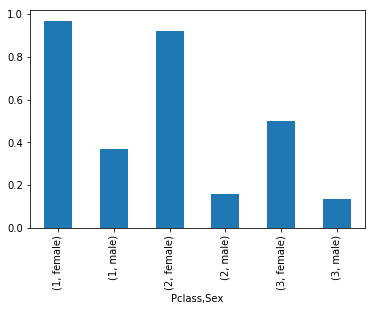

In [8]:
class_sex_group['Survived'].plot.bar()

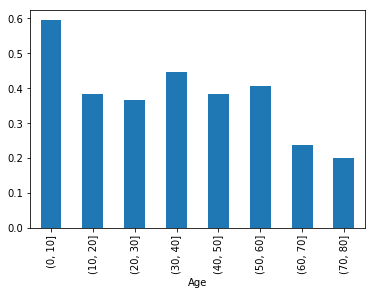

In [9]:
group_by_age = pd.cut(full_data["Age"], np.arange(0, 90, 10))
age_grouping = full_data.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [10]:
full_data.count()
# droping the Cabin coulmn as that information is not given for all data
full_data = full_data.drop("Cabin" , axis = 1)
full_data = full_data.dropna()

In [11]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    processed_df = processed_df.drop(['Name','Ticket'],axis=1)
    return processed_df

processed_df = preprocess_titanic_df(full_data)

In [12]:
X = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values

In [13]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [14]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.78321678321678323

In [15]:
import graphviz
dot_data = tree.export_graphviz(clf_dt, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         feature_names=full_data.feature_names,  
                         class_names=full_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [ ]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [ ]:
test_classifier(clf_dt)

In [ ]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

In [ ]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

In [ ]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)